# Домашнее задание

## Предсказание оттока телеком компании

#### Что такое "скорость оттока"?

Коэффициент оттока - это процент подписчиков на услугу, которые прекращают свою подписку на услугу в течение заданного периода времени. Для того чтобы компания могла расширить свою клиентуру, ее темпы роста, измеряемые числом новых клиентов, должны превышать темпы оттока. Этот показатель обычно выражается в процентах.

#### Почему отток так важен?

Отток клиентов - это термин, используемый в компаний с подписочной моделью ведения бизнеса, для описания потери клиентов. Например, если 10 из 100 подписчиков интернет-провайдера (ISP) отменили свои подписки, скорость оттока для этого провайдера составит 10%.

Отток важен, потому что он напрямую влияет на прибыльность вашего сервиса. Принято считать, что прибыльность услуги напрямую связана с ростом ее клиентской базы. Это может привести владельцев бизнеса к выводу, что для того, чтобы увеличить свою клиентскую базу, скорость приобретения новых клиентов должна превышать скорость оттока.

#### Что из себя представляет датасет?

Датасет представляет из себя 3333 записи из истории компании о клиентах с 20 колонками. Каждая колонка описывает клиента - его штат проживания, время использования услуги, номер, перечень подписок, время разговора, прочее.

#### В чем состоит ваше задание?

Ниже будет представлен конвейер (pipeline) обработки датасета с комментариями. На основе комментариев и результатов уже выполненых ячеек вам нужно будет восстановить код (на основе материалов занятий) по загрузке, обработке и построении модели наших данных.

Желательно придерживаться в обработке результатов, которые вы уже увидите в ячейках. Вам необходимо до 30.06.2020 (мягкий дедлайн) прислать ссылку на этот ноутбук или сам ноутбук на почту tixons.work@gmail.com (с комментарии, если у Вас не получился результат (хотя бы схожий с моим) и в чем возникли сложности).

Жесткий дедлайн - 07.07.2020, после него задания не принимаются. Если у вас есть уважительная причина - напишите мне в личку, сдвинем сроки.

------

## Загрузка данных

Загрузка данных может зависить от среды, где вы работаете. 

Если это гугл колаб - вам необходимо выполнить следующие комманды:

В первой вам необходимо перейти по ссылке, авторизироваться со своим аккаунтом, скопировать код из окна и вставить в поле выполнения ячейки.

Загружаем все необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Открываем склонированную папку

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tixonsit/Sberbank_materials/master/telecom_churn.csv')

Отображаем данные

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


В случае, если вы работаете из среды анаконда - вам необходимо положить файл рядом с ноутбуком и выполнить:

```
df = pd.read_csv('./telecom_churn.csv')
```

 

## Работа с признаками

#### Визуальный анализ

Изучим наши данные, какие признаки исходного датасета никак не повлияют на результат прогноза? Выбросим такие столбцы и отобразим результат.

In [4]:
# номер телефона никак не повлияет на результат прогноза

df = df.drop(['phone number'], axis = 1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Посмотрим на описательную статистику, которая суммирует центральную тенденцию, дисперсию и форму распределения набора данных. Корректно ли все заполнено?

In [5]:
# посмотрим основыне статистики

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Исследуем на наличие пропусков

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

Посмотрим на типы данных наших столбцов:

In [7]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

Посмотрим как сбалансированны наши классы, можно распечатать или отобразить на грфике. Если не помните почему надо балансировать классы - [тык](https://www.coursera.org/lecture/supervised-learning/niesbalansirovannyie-dannyie-M97UX)

Можно увидеть, что данные несбалансированны.


churn
False    2850
True      483
Name: churn, dtype: int64
Процент данных показывающих целевую группу "отток": 14.0%


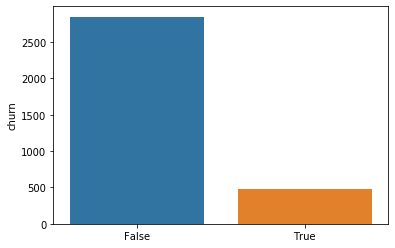

In [8]:
balance = df.groupby('churn')['churn'].count()
print(balance)
print(f'Процент данных показывающих целевую группу "отток": {np.round(balance[1]/len(df) * 100) }%')
sns.barplot(x = [False, True], y = balance)

#### Работа с категориальными признаками

Если вы не понимаете логику за работой с котегориальными признаками - посмотрите [сюда](https://www.coursera.org/lecture/supervised-learning/rabota-s-katieghorial-nymi-priznakami-pqU2j), если же не знаете как это сделать в коде - [сюда](https://colab.research.google.com/drive/17UJ3zkE6dUL5UpQnLiaQp3f7BpV6iEss#scrollTo=_238K7-NQajf), пункт про категориальные признаки.

Посмотрим на те колонки, в которых тип данных object (строка) и перекодируем их, воспользуемся кодом с занятия.

In [9]:
df.dtypes[df.dtypes == object]

state                 object
international plan    object
voice mail plan       object
dtype: object

In [10]:
from sklearn import preprocessing

def number_encode_features(init_df):
    result = init_df.copy() 
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders


encoded_data, encoders = number_encode_features(df)
encoded_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Отобразим сами энкодеры

In [11]:
encoders

{'state': LabelEncoder(),
 'international plan': LabelEncoder(),
 'voice mail plan': LabelEncoder()}

Выделим целевую переменную в бинарный формат (в отдельную переменную)

In [12]:
y = np.array([1 if i == True else 0 for i in encoded_data['churn']]) # ответы
y

array([0, 0, 0, ..., 0, 0, 0])

Выделим целевую переменную в бинарный формат и выкенем ее из обучающей выборки.

In [13]:
encoded_data = encoded_data.drop(['churn'], axis= 1)
print('Ответы\n', y)
print('Обучающая выборка')
encoded_data.head()

Ответы
 [0 0 0 ... 0 0 0]
Обучающая выборка


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Посмотрим на распределение велечин по признакам в наших данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BF1F301448>,
      dtype=object)

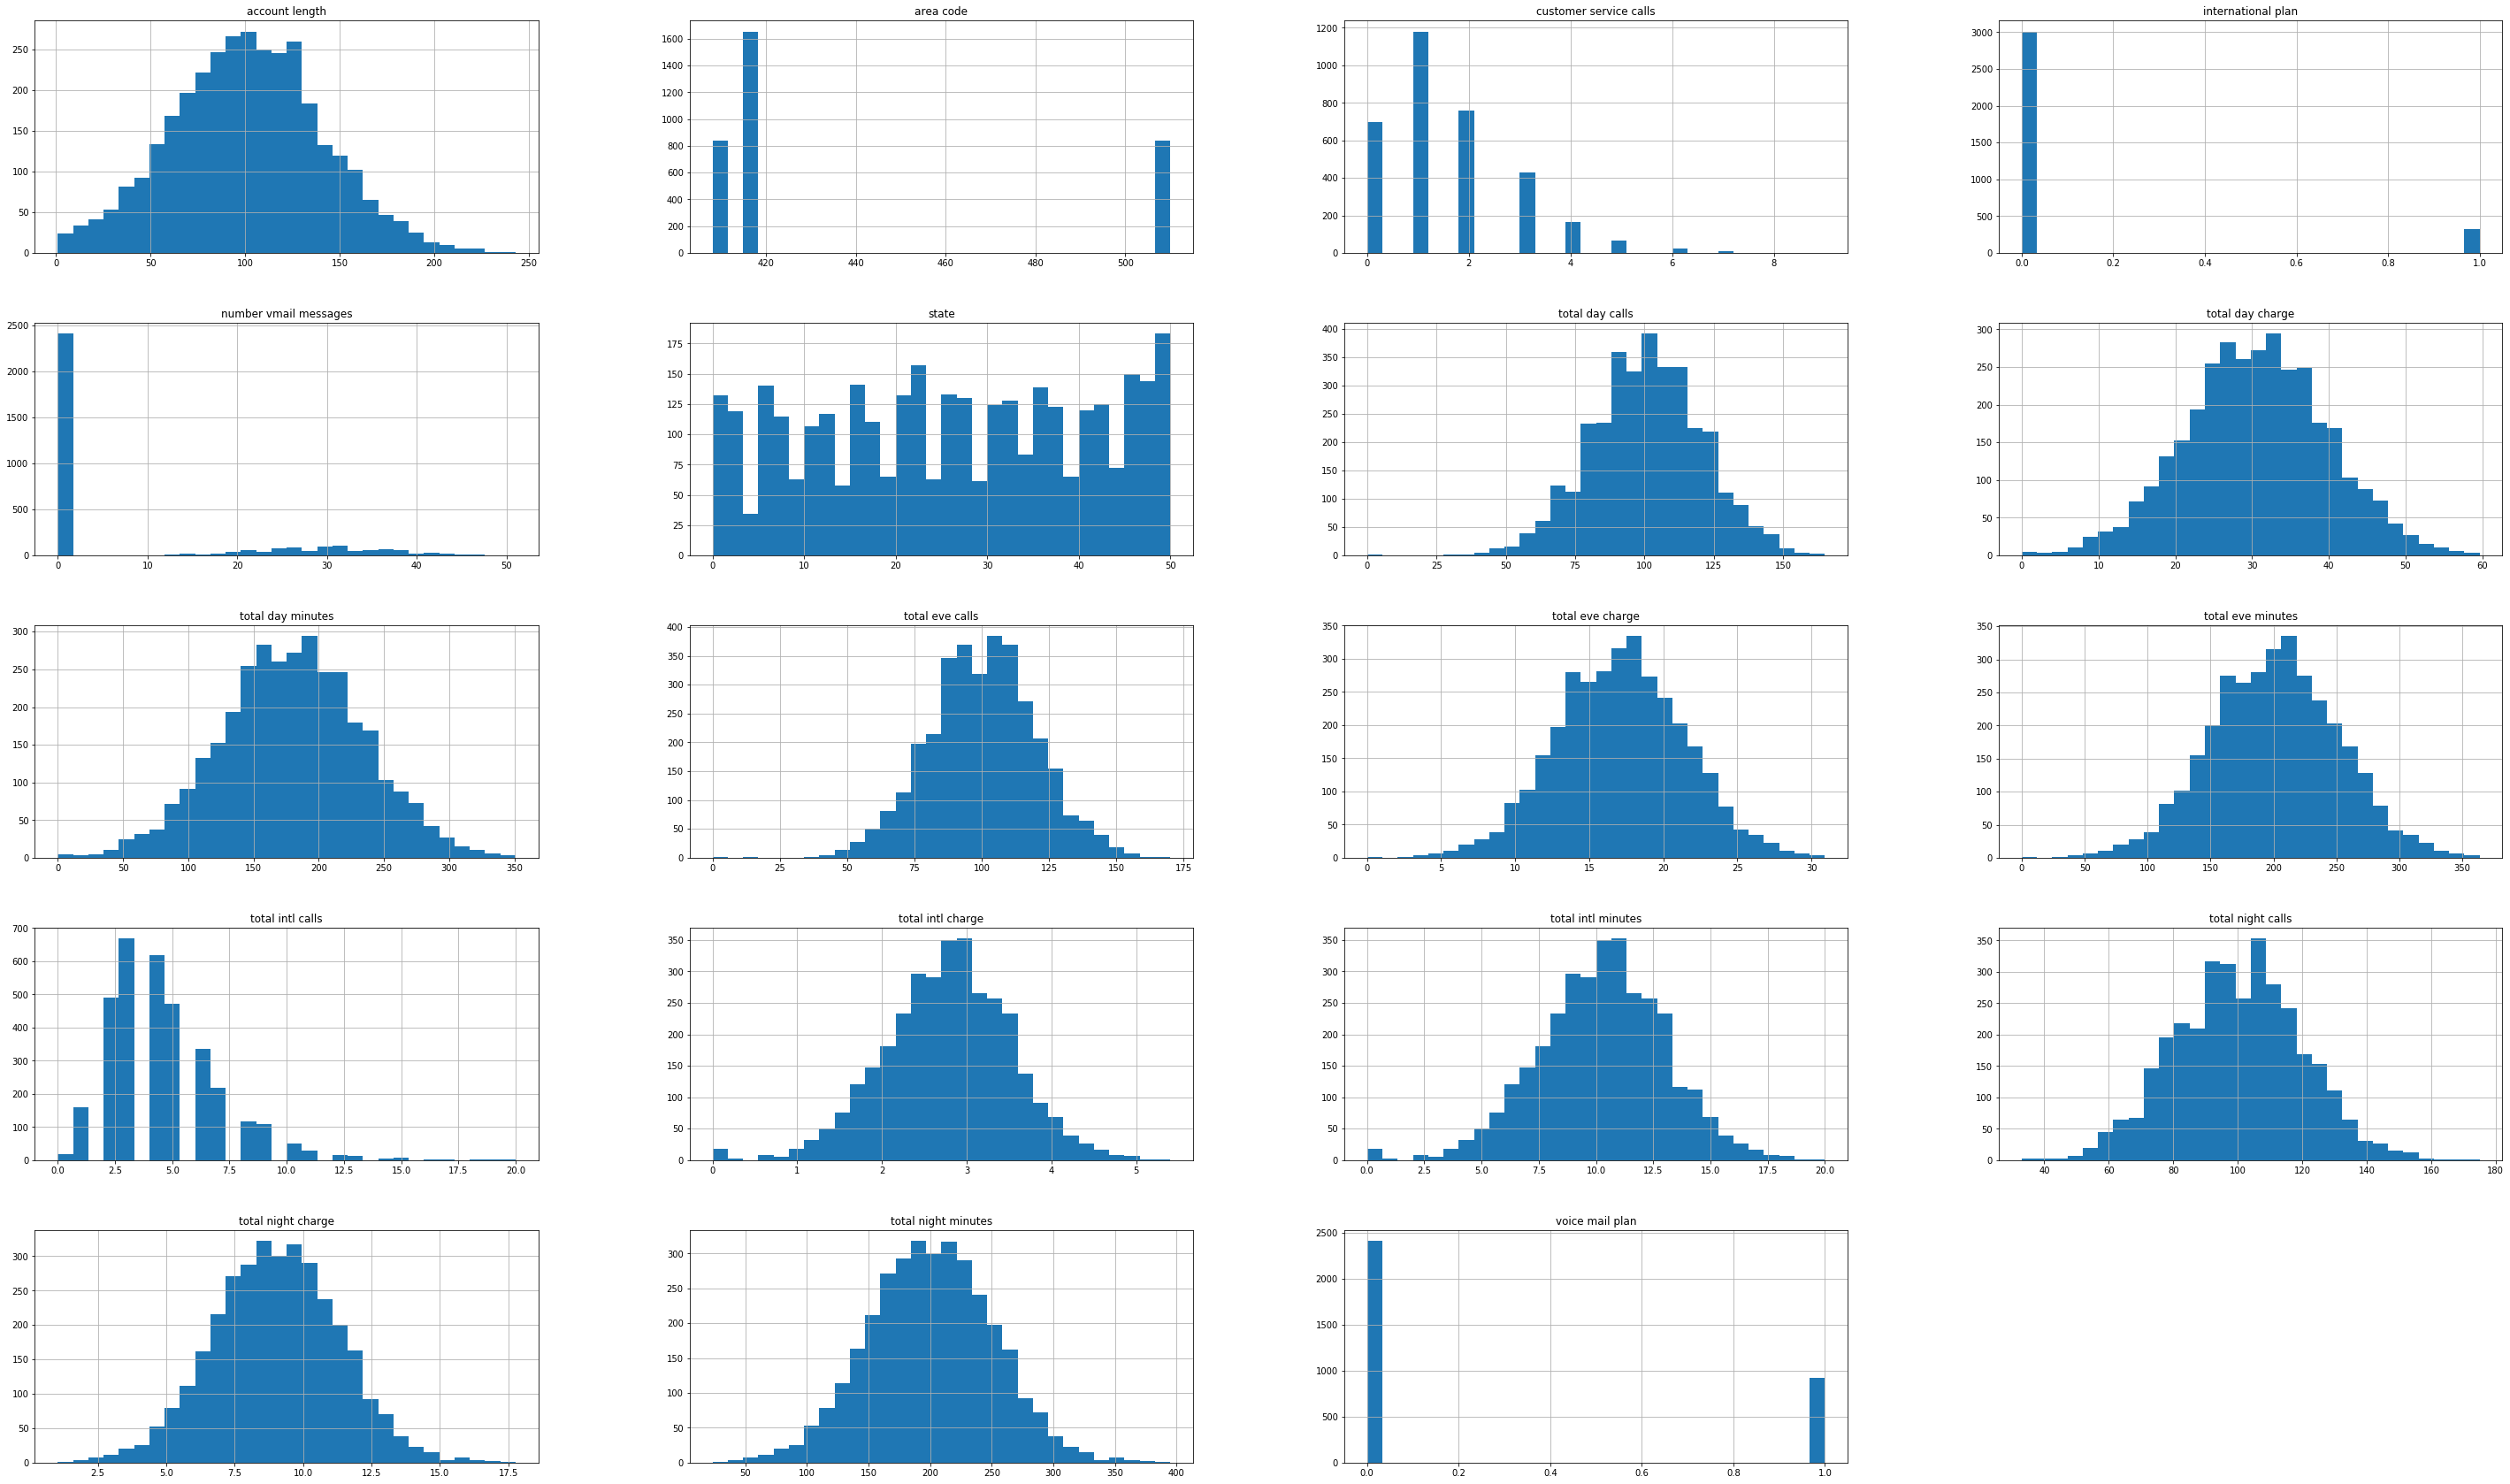

In [14]:
%matplotlib inline
encoded_data.hist(bins=30,figsize=(50,30))

Посмтроим матрицу корреляций, выбросим данные с единичной линейной зависимостью - они (шум) просто повысят вычислительную сложность.

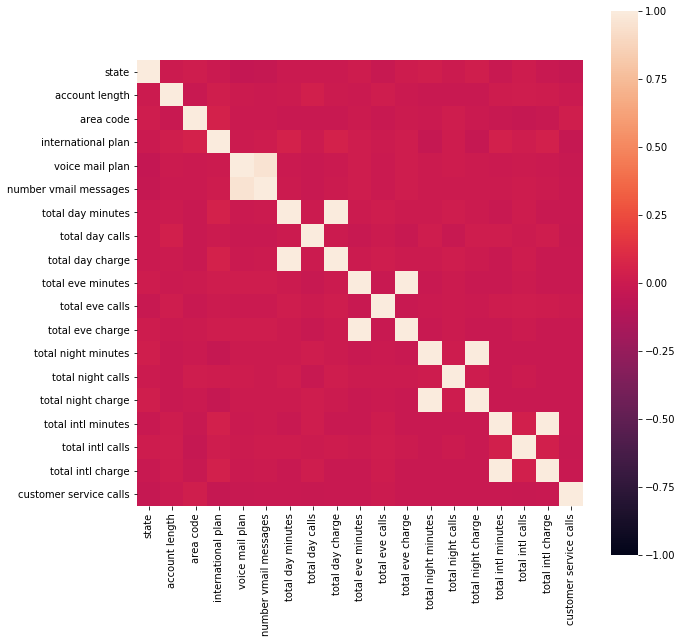

In [15]:
plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data.corr(), vmin=-1, square=True)
plt.show()

In [16]:
encoded_data = encoded_data.drop(['total day charge','total eve charge','total night charge','total intl charge'], axis= 1)
encoded_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3


## Работа с данными

Создадим обучающую выборку Х, перевдем получанные цифровые данные в np.array

In [17]:
X = np.array(encoded_data, float)
X

array([[ 16. , 128. , 415. , ...,  10. ,   3. ,   1. ],
       [ 35. , 107. , 415. , ...,  13.7,   3. ,   1. ],
       [ 31. , 137. , 415. , ...,  12.2,   5. ,   0. ],
       ...,
       [ 39. ,  28. , 510. , ...,  14.1,   6. ,   2. ],
       [  6. , 184. , 510. , ...,   5. ,  10. ,   2. ],
       [ 42. ,  74. , 415. , ...,  13.7,   4. ,   0. ]])

Нормализуем наши данные. Если не помните зачем это делать? [тык](https://www.coursera.org/lecture/supervised-learning/masshtabirovaniie-priznakov-ozNT3)

In [18]:
mean = X.mean(axis=0)
std = X.std(axis=0)

X = (X - mean)/std
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.08500823,
        -0.60119509, -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ...,  1.24048169,
        -0.60119509, -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.70312091,
         0.21153386, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  1.3837779 ,
         0.61789834,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ..., -1.87621082,
         2.24335625,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ...,  1.24048169,
        -0.19483061, -1.1882185 ]])

Надо помнить, что наша выборка несбралансирована, так что надо будет провести ее балансировку, в ходе занятия было показано, что будет (у precision 0.18), если ее не проводить:

Найдем по y индексы клиентов, которые относятся к классу "не ушили"
и, перемешав выборку, обрежем ее до размеров "ушедших". Т.к. это на занятии не разбиралось - код прилагается.

Альтернативой выбрасыванию ценных данных - модифицировать шаг градиентного спуска для класса с несбалансированными данными.

Большинство алгоритмов sklearn имеют аргумент class_weight, который принимает на вход частоты каждого распознаваемого класса или считает их вытоматически, если указано 'balanced'

Пример из алгоримта SVM:

class_weight dict or ‘balanced’, default=None

Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

Использовать модифицированный шаг градиентного спуска предпочтительнее, если алгоритм поддерживает его (в большинстве случаев так и есть). В качестве примера возможного варинта балансировки - убрать лишние данные. Ниже представлен код, который находит индексы в зависимости от метки класса и выбрасывает лишние.

In [19]:
# np.argwhere вернет индексы тех элементов массива y (целевой переменной), где значение 0
not_churn_ids = np.argwhere(y == 0).flatten()
print('Всего не ушедших', len(not_churn_ids))
not_churn_ids

Всего не ушедших 2850


array([   0,    1,    2, ..., 3330, 3331, 3332], dtype=int64)

Перемешаем массив с выбранным random state (чтоб в дальнейшем у нас совпадали выборки) выберем в нем "лишние" id тех, кто остались (кто портит нам прогноз алгоритма). Кол-во "лишних" = кол-во оставшихся - кол-во ушедшых.

In [20]:
from sklearn.utils import shuffle

not_churn_ids = shuffle(not_churn_ids, random_state = 42)
# найдем "лишних", для этого обрежем найденные id на кол-во ушедших (внутри len)
not_churn_ids = not_churn_ids[len(np.argwhere(y == 1).flatten()):]
print(len(not_churn_ids))
# отображаем кол-во и сами id, которые мы должны выкинуть
not_churn_ids

2367


array([ 877, 3298,  614, ..., 1291, 1482,  989], dtype=int64)

Проверим, сбалансированны ли классы

по идее (оставшиеся) - ("лишние") = (ушедшие)

In [21]:
len(np.argwhere(y == 0).flatten()) - len(not_churn_ids) == len(np.argwhere(y == 1).flatten())

True

Теперь можно выкинуть "лишние" id из X и y

In [22]:
# np.delete принимает массив, индексы, которые выбросить и по какой оси выкидывать
X = np.delete(X, not_churn_ids, 0)
y = np.delete(y, not_churn_ids, 0)

In [23]:
# отобразим итоговый размер признаков датасета
# в примере вывода ячейки X.shape = (966,19), похоже, не были удалены линейно зависимые признаки
X.shape, y.shape

((966, 15), (966,))

Теперь видим, что классы сбалансированы.

In [24]:
pd.Series(y).value_counts()

1    483
0    483
dtype: int64

## Создание алгоритмов

Посмотрим на 2 типа алгоритмов, которые мы прошли - KNN и линейную модель. В случае KNN будем решать задачу классификации. В случае линейного классификатора, для демонстрации всей обработки, будем использовать регрессию.

Разделим нашу выборку на test train в соотношении 85 на 15 %

In [25]:
# train - test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.15,
                                                   random_state= 42)


#### KNN

Построим сетку, по аналогии с занятием 6, для перебора гиперпараметра для нахождения лучшего гиперпараметра KNN, пройдем 100 значений (от 1 до 100)

In [26]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}
gs = GridSearchCV(knn, grid, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,

In [27]:
# функция отрисовки для grid search

def grid_plot(x, y, x_label, title, y_label='accuracy'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

Строим график зависимости качества от числа соседей

подсказка: результаты обучения хранятся в атрибуте cv_results_ объекта gs (grid search из библиотеки sklearn)

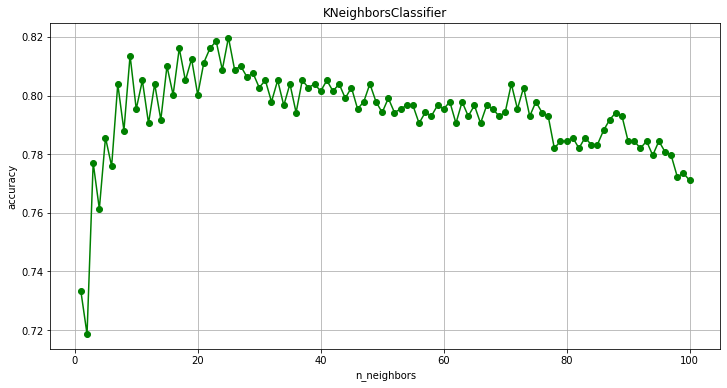

In [28]:
grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

Отобразим лучший параметр (y gs есть атрибуты best_param, best_score)

In [29]:
print(gs.best_params_, gs.best_score_)

{'n_neighbors': 25} 0.819770879526977


Инициализируем отдельный классификатор с лучшим значением, найденным на предыдущего перебора

In [30]:
knn = KNeighborsClassifier(n_neighbors=25) 
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

Получим предсказания от классификатора

In [31]:
y_knn

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

Посмотрим на метрики качества через classification report

In [32]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        73
           1       0.87      0.74      0.80        72

    accuracy                           0.81       145
   macro avg       0.82      0.81      0.81       145
weighted avg       0.82      0.81      0.81       145



#### Линейный классификатор

Построим линейную регрессию, по аналогии с занятием

In [33]:
# линейная регрессия без тюнинга

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
y_lin_reg = linear_regressor.predict(X_test)

Получим результаты

In [34]:
y_lin_reg

array([ 0.36491012, -0.00803942,  0.49966348,  0.39279667,  0.32931416,
        0.03529229,  0.46628737,  0.66071897,  0.61912138,  0.31434876,
        0.67557015,  0.50952445,  0.62463223,  0.64381514,  0.97660338,
        0.16196862,  0.35018359,  0.50998392,  0.59210209, -0.22235997,
        0.01848433,  0.41400391,  0.28525396,  0.58838004,  0.30144974,
        0.1223382 ,  0.36062981,  0.49548444,  0.60180417,  0.38268767,
        0.5855784 ,  0.75328017,  0.46691163,  0.10580058,  0.81596381,
        0.32385145,  1.00633185,  0.33254164,  0.24505222,  0.4672771 ,
        0.60104152,  0.17420288,  0.52180817,  0.77250733,  0.91342609,
        0.34574777,  0.93274455,  1.06944159,  0.25561476,  0.13120826,
        0.32280614,  0.85200222,  0.58054483,  0.73684937,  0.35288377,
        0.64236168,  0.6867475 ,  0.19686724,  0.23236814,  0.97530563,
        0.5976762 ,  0.29339085,  0.5791836 ,  0.73637745,  0.38830587,
        0.82942416,  0.05902858,  0.34695337,  0.93775684,  0.61

Построим график того, как истинные ответы отличаются от предсказанных

(array([2., 0., 2., 0., 1., 4., 5., 2., 1., 8., 3., 2., 3., 9., 5., 5., 5.,
        4., 2., 0., 4., 1., 3., 4., 3., 3., 0., 2., 3., 2., 4., 3., 3., 6.,
        9., 9., 1., 2., 4., 0., 2., 3., 2., 2., 1., 1., 1., 3., 0., 1.]),
 array([-0.83500043, -0.79948099, -0.76396156, -0.72844212, -0.69292268,
        -0.65740325, -0.62188381, -0.58636437, -0.55084493, -0.5153255 ,
        -0.47980606, -0.44428662, -0.40876719, -0.37324775, -0.33772831,
        -0.30220888, -0.26668944, -0.23117   , -0.19565056, -0.16013113,
        -0.12461169, -0.08909225, -0.05357282, -0.01805338,  0.01746606,
         0.0529855 ,  0.08850493,  0.12402437,  0.15954381,  0.19506324,
         0.23058268,  0.26610212,  0.30162155,  0.33714099,  0.37266043,
         0.40817987,  0.4436993 ,  0.47921874,  0.51473818,  0.55025761,
         0.58577705,  0.62129649,  0.65681593,  0.69233536,  0.7278548 ,
         0.76337424,  0.79889367,  0.83441311,  0.86993255,  0.90545198,
         0.94097142]),
 <a list of 50 Patch 

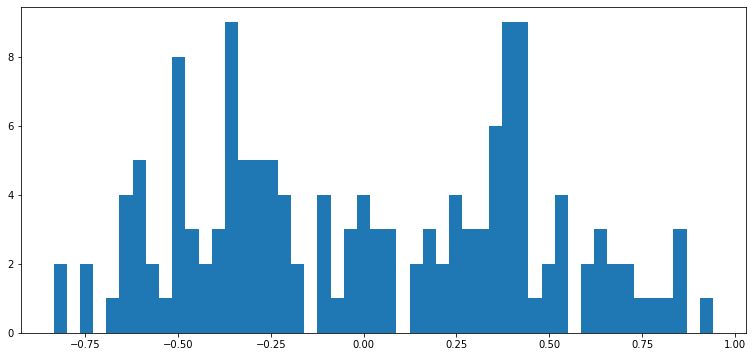

In [35]:
plt.figure(figsize=[13,6])

plt.hist(y_test - y_lin_reg, bins= 50)

Получим результат по $R^2$

In [36]:
print(f'R2 score = {metrics.r2_score(y_test, y_lin_reg)}')

R2 score = 0.20610304875180252


Получим результат по MAE

In [37]:
print(f'MAE = {metrics.mean_absolute_error(y_test, y_lin_reg)}')

MAE = 0.39227466277456013


Мы построили 2 алгоритма, классификации через KNN - получили достаточно высокий f1 (~82%), без заметных проседаний в метриках Precision и Recall (благодаря балансировке классов) и линейный классификатор, который показал себя хуже, что видно по метрикам $R^2$ и Mean absolute error

Решил прогнать ещё пару алгоритмов

In [39]:
# логистическая регрессия

from sklearn.linear_model import LogisticRegression

alg = LogisticRegression()

grid = {'penalty': ['l1', 'l2', 'elasticnet'],
        'C': np.array(np.logspace(-3, 2, num = 10), dtype='float'),
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished


({'C': 0.5994842503189409, 'penalty': 'l2'}, 0.7576496674057649)

In [40]:
logreg = LogisticRegression(penalty='l2', C =  0.5994842503189409) 
logreg.fit(X_train, y_train)
y_logreg = logreg.predict(X_test)

print(metrics.classification_report(y_test, y_logreg))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        73
           1       0.72      0.74      0.73        72

    accuracy                           0.72       145
   macro avg       0.72      0.72      0.72       145
weighted avg       0.72      0.72      0.72       145



Логистическая регрессия справилась хуже, чем knn

In [41]:
# метод опорных векторов

from sklearn.svm import SVC

alg = SVC()

grid = {'C': np.array(np.linspace(-5, 5, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished


({'C': 1.666666666666667, 'kernel': 'rbf'}, 0.8429046563192906)

In [42]:
svm = SVC(C= 1.666666666666667, kernel = 'rbf')
svm.fit(X_train, y_train)
y_svm = svm.predict(X_test)

print(metrics.classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86        73
           1       0.90      0.79      0.84        72

    accuracy                           0.86       145
   macro avg       0.86      0.85      0.85       145
weighted avg       0.86      0.86      0.85       145



Немного лучше, чем knn

In [43]:
# Decision Tree без тюнинга

from sklearn import tree

DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_DT = DT.predict(X_test)

print(metrics.classification_report(y_test, y_DT))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83        73
           1       0.82      0.83      0.83        72

    accuracy                           0.83       145
   macro avg       0.83      0.83      0.83       145
weighted avg       0.83      0.83      0.83       145



Плюс минус на одном уровне с svm и knn

In [44]:
# Random Forest без тюнинга

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_RF = RF.predict(X_test)

print(metrics.classification_report(y_test, y_RF))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        73
           1       0.89      0.89      0.89        72

    accuracy                           0.89       145
   macro avg       0.89      0.89      0.89       145
weighted avg       0.89      0.89      0.89       145



Random Forest справился лучше всех. Если провести тюнинг, можно добиться ещё лучших результатов